# 🏨Hotel canceling reservation using XGBoost Classification

In this notebook, we are willing to understand:
> why or when did people cancel their reservation. And try to teach it to the model so it could predict such an event!

We're gonna use the XGBoost model for this one!

What we're gonna cover here:
* Installing XGBoost
* Importing libraries and data
* EDA
* Creating X & y variables
* Split our data into train and test sets
* Creating the XGBoost model
* Fit the data into the model
* Extracting feature importance
* Using cross validation (CV) to decrease error
* Using Randomized Search CV

## Installing XGBoost

In [1]:
!pip install xgboost

## Importing libraries and data

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb

In [3]:
bookings = pd.read_csv('drive/MyDrive/XGBoost/hotel_bookings_clean.csv')
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [4]:
bookings.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


As you can see we have 119210 items (rows) in our dataframe, and 53 columns and we want the model to predict the `is_calceled` column based on others.

The datatypes for all the columns are numerical (int64) so we're good to go

## EDA

In [5]:
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,...,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,...,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


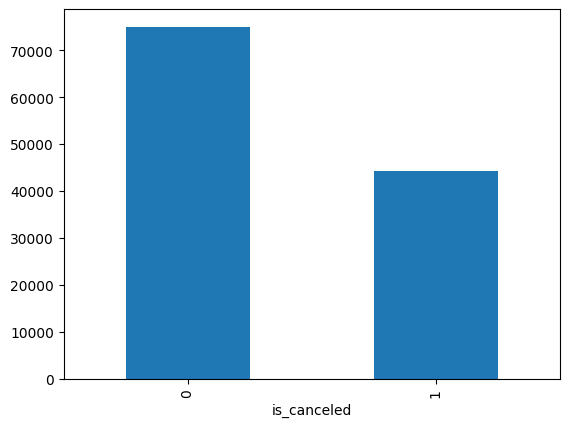

In [6]:
bookings['is_canceled'].value_counts().plot(kind='bar');

It shows that most people didn't cancel the reservation but 1/3 of the whole population did.

In [14]:
print(f"{len(bookings[bookings['is_canceled'] == 1]) / len(bookings) * 100:2.0f}% of the population canceled the reservation")
print(f"{len(bookings[bookings['is_canceled'] == 0]) / len(bookings) * 100:2.0f}% of the population did not cancel the reservation")

37% of the population canceled the reservation
63% of the population did not cancel the reservation


In [15]:
bookings.corr()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.292876,0.008315,-0.005948,0.011179,-0.001323,0.025542,0.058182,0.004862,-0.032569,...,-0.001672,0.005436,-0.000550,-0.477957,0.481507,-0.011345,-0.023690,-0.038842,0.133235,-0.124271
lead_time,0.292876,1.000000,0.127046,0.002306,0.131603,0.085985,0.166892,0.117575,-0.037886,-0.021003,...,-0.029744,-0.017132,-0.006911,-0.380173,0.380120,0.016564,0.068627,-0.031759,-0.174030,0.159538
arrival_date_week_number,0.008315,0.127046,1.000000,0.066572,0.995101,0.018629,0.016047,0.026567,0.005559,0.010417,...,-0.002047,0.005354,0.001393,-0.005903,0.007831,-0.016901,0.090342,0.011246,-0.079507,0.042228
arrival_date_day_of_month,-0.005948,0.002306,0.066572,1.000000,-0.026335,-0.016225,-0.028362,-0.001754,0.014541,-0.000235,...,0.004861,0.002873,-0.004012,0.005003,-0.008643,0.032171,-0.012178,-0.001704,-0.000426,0.006168
arrival_date_month,0.011179,0.131603,0.995101,-0.026335,1.000000,0.018851,0.019739,0.029239,0.005483,0.010193,...,-0.001879,0.005222,0.001794,-0.006471,0.008809,-0.020520,0.091687,0.011457,-0.079496,0.041581
stays_in_weekend_nights,-0.001323,0.085985,0.018629,-0.016225,0.018851,1.000000,0.494175,0.094759,0.046134,0.018607,...,0.036697,0.012479,-0.005421,0.113828,-0.114571,0.001789,0.102708,-0.007566,0.020028,-0.065740
stays_in_week_nights,0.025542,0.166892,0.016047,-0.028362,0.019739,0.494175,1.000000,0.096214,0.044651,0.020373,...,0.041310,0.016107,-0.005607,0.079174,-0.080321,0.006857,0.134339,-0.016898,0.007839,-0.065311
adults,0.058182,0.117575,0.026567,-0.001754,0.029239,0.094759,0.096214,1.000000,0.029416,0.017890,...,0.051264,0.105558,0.003792,0.030537,-0.031030,0.003091,0.020339,0.060427,0.091906,-0.116878
children,0.004862,-0.037886,0.005559,0.014541,0.005483,0.046134,0.044651,0.029416,1.000000,0.023999,...,0.392982,0.156345,-0.001851,0.097132,-0.096833,-0.006769,-0.018143,-0.006600,0.096220,-0.092929
babies,-0.032569,-0.021003,0.010417,-0.000235,0.010193,0.018607,0.020373,0.017890,0.023999,1.000000,...,0.031676,0.005121,-0.000579,0.030677,-0.030484,-0.003012,-0.000197,0.000535,0.021613,-0.022945


In [16]:
bookings.corr()['is_canceled'].sort_values(ascending=False)

,is_canceled
is_canceled,1.000000
deposit_type_Non_Refund,0.481507
lead_time,0.292876
market_segment_Groups,0.221990
distribution_channel_TA_TO,0.176005
hotel_City,0.137082
customer_type_Transient,0.133235
previous_cancellations,0.110139
booked_by_agent,0.102218
reserved_room_type_A,0.069117


Here we're checking which columns have more corrolation (linear relationship) with the column `is_canceled`.

Note that the given output is sorted.☝️

## Creating X & y variables

In [17]:
X, y = bookings.iloc[:,1:], bookings.iloc[:,0]

## Split our data into train and test sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=123)

## Creating the XGBoost model

In [19]:
xgb_clf = xgb.XGBClassifier(random_state=123)
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## Fit the data into the model

In [20]:
xgb_clf.set_params(n_estimators=10)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)

In [21]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.8138790035587189


**Question:** Is this accuracy good (enough) for such dataset? If no, how can we make that number better?

Well it seems like 10 estimators are not enough for this project (since we have about ~120000 rows and ~50 columns!)

Another thing is that we didn't do any preprocessing. Maybe if we do that, the results would be better.



## Extracting feature importance

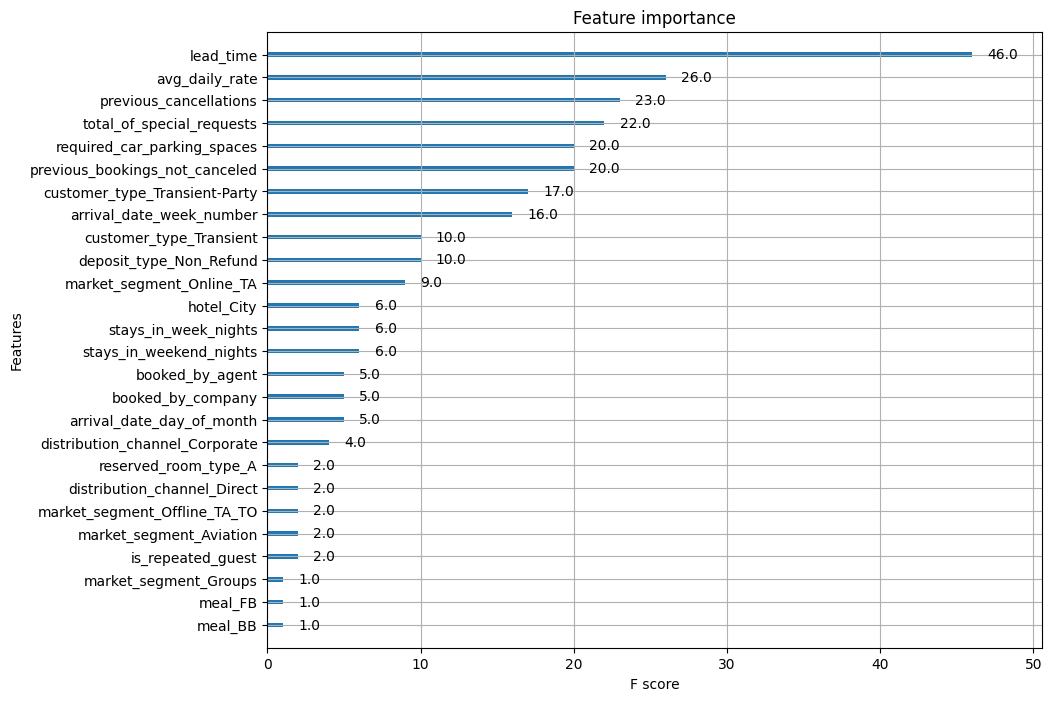

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)
xgb.plot_importance(xgb_clf);

`lead_time` and `avg_daily_rate` are the most effective columns.

**Question:** Does that mean that these two should nessessory have
 a high corrolation with `is_canceled`?

 No! Not nessessory! Because corrolation only shows the linear relation between two columns.

 ## Using cross validation (CV) to decrease error

In [23]:
bookings_dmatrix = xgb.DMatrix(data=X,label=y)

In [24]:
params = {"objective":"binary:logistic", 'max_depth': 3}
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3,
                    num_boost_round=40,early_stopping_rounds=10, seed=123, metrics=['error'])
xgb_cv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.238667,0.006745,0.239552,0.009779
1,0.233072,0.001330,0.233059,0.000903
2,0.233235,0.000955,0.233235,0.001217
3,0.233198,0.000752,0.233160,0.001495
4,0.232321,0.001424,0.232455,0.000993
5,0.232468,0.001139,0.232506,0.001140
6,0.192777,0.000860,0.192996,0.001304
7,0.189913,0.003105,0.190596,0.001231
8,0.191209,0.002874,0.191972,0.002059
9,0.191192,0.001752,0.191569,0.001774


In [25]:
accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]
print("accuracy:", accuracy)

accuracy: 0.8156027181483166


In [26]:
from sklearn.metrics import accuracy_score
xgb_clf = xgb.XGBClassifier(n_estimators=25, random_state=123)

In [27]:
xgb_clf.set_params(max_depth=10)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

0.8349008642602949

We improved it up to 83% !!!

## Using Randomized Search CV

We use RandomizedSearchCV to check the accuracy and find out which hyperparameters are more useful.

In [28]:
from sklearn.model_selection import RandomizedSearchCV

rs_param_grid = {
    'max_depth': list((range(3,12))),
    'alpha': [0,0.001, 0.01,0.1,1],
    'subsample': [0.5,0.75,1],
    'learning_rate': np.linspace(0.01,0.5, 10),
    'n_estimators': [10, 25, 40]
    }

xgb_clf = xgb.XGBClassifier(random_state=123)
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid,
                                cv=3, n_iter=5, verbose=2, random_state=123)
xgb_rs.fit(X_train, y_train)
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.4s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.4s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.4s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.7s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.7s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.7s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.8s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   1.2s
[CV] END

<div style=" padding: 40px; text-align: left; color: #535453;">
    Notebook by:
    <h2 style="font-family: 'calibri', sans-serif;ext-align: center;  font-size: 50px; margin-top: 0; margin-bottom: 20px;">
    Elyas Najafi
    </h2>
</div>